<a href="https://colab.research.google.com/github/FizaAslam1/openai-huggingface/blob/main/openai_and_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import pipeline

analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

def analyze(text):
    result = analyzer(text)[0]
    print(f"Text: {text}\nSentiment: {result['label']} (Confidence: {result['score']:.2%})")

analyze("I love this product!")  # POSITIVE
analyze("This was terrible")     # NEGATIVE

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


Text: I love this product!
Sentiment: POSITIVE (Confidence: 99.99%)
Text: This was terrible
Sentiment: NEGATIVE (Confidence: 99.96%)


In [ ]:
from sentence_transformers import util, SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')  # Free embedding model

def compare(text1, text2):
    emb1 = model.encode(text1)
    emb2 = model.encode(text2)
    sim = util.cos_sim(emb1, emb2).item()
    print(f"Similarity: {sim:.2f}/1.0")

compare("The cat sat", "A feline rested")  # 0.78

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Similarity: 0.54/1.0


In [ ]:
from openai import OpenAI
client = OpenAI(api_key="free-tier-key")  # Use actual free tier key

def generate_blog(topic):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": f"Write a 300-word blog about {topic} with SEO metadata"}]
    )
    print(response.choices[0].message.content)

generate_blog("sustainable energy")

In [ ]:
pipe = pipeline("text-generation", model="gpt2")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
pipe = pipeline("sentiment-analysis")
pipe("I'm excited!")[0]['label']  # POSITIVE

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


'POSITIVE'

In [ ]:
ner = pipeline("ner", grouped_entities=True)
text = "Apple opened a store in Cupertino"
[(ent['word'], ent['entity_group']) for ent in ner(text)]
# [('Apple', 'ORG'), ('Cupertino', 'LOC')]

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


[('Apple', 'ORG'), ('Cupertino', 'LOC')]

In [ ]:
generator = pipeline("text-generation", model="gpt2")
generator("fiza a agood girl", max_length=50)[0]['generated_text']

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


'fiza a agood girl (pornographic image)\n\nA woman was rescued from a river in Uttar Pradesh on Thursday after she was caught in a shark attack.\n\nThe woman was rescued from the river in Uttar Pradesh after she was caught in a shark attack\n\nThe woman was rescued from the river in Uttar Pradesh after she was caught in a shark attack\n\nThe incident happened in the vicinity of Bhavnagar area, in the district of Uttar Pradesh.\n\nPolice said the girl was picked up by her parents and taken to the local hospital.\n\nThe girl is said to have been in a condition of shock under a shark attack.\n\nThe fish, known as "kulai" (cubic shark), is a small fish that has a long, sharp dorsal fin.\n\nThe fish is usually found in the wild, and is not known to be poisonous.\n\nSitting in the water, the girl was helped to her feet by her parents and brought to the hospital.\n\nThe girl\'s condition was treated and she has been discharged from hospital.\n\nPolice said it was a case of shark attack, and t

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenizer("Hello world!")['input_ids']  # [101, 7592, 2088, 999, 102]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

[101, 7592, 2088, 999, 102]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=600) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


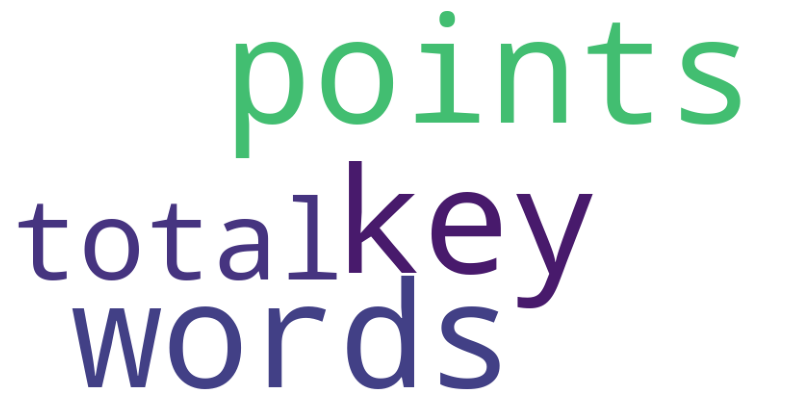

🚀 Title: A good girl name fiza

📝 Content Preview:
3-5 key points (300 words total)...

🔍 Keywords: 5-7 comma-separated phrases
🔖 Meta Description: 50-60 character snippet

Blog Structure:

1. Title:   A good girl name fiza

2. Introduction: Engaging paragraph

3. Main Content: 5-7 key points (300 words total)

4. Conclusion: Summary and call-to-action

5. SEO Keywords: 5-7 comma-separated phrases

6. Meta Description: 50-60 character snippet

Blog Structure:

1. Title:   A good girl name fiza

2. Introduction: Engaging paragraph

3. Main Content: 5-7 key points (300 words total)

4. Conclusion: Summary and call-to-action

5. SEO Keywords: 5-7 comma-separated phrases

6. Meta Description: 50-60 character snippet

Blog Structure:

1. Title:   A good girl name fiza

2. Introduction: Engaging paragraph

3. Main Content: 5-7 key points (300 words total)

4. Conclusion: Summary and call-to-action

5. SEO Keywords: 5-7 comma-separated phrases

6. Meta Description: 50-60 character snippet

Bl

In [ ]:
from transformers import pipeline
import torch  # Added missing import
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_blog(topic):
    """Generate a complete blog post with visualizations using free models"""
    try:
        # Initialize pipeline with GPU acceleration if available
        device = 0 if torch.cuda.is_available() else -1
        generator = pipeline(
            "text-generation",
            model="gpt2",
            device=device,
            torch_dtype=torch.float16 if device == 0 else torch.float32
        )

        # Enhanced prompt engineering
        prompt = f"""Create a detailed blog post about {topic} with these sections:
1. Title:   A good girl name fiza
2. Introduction: Engaging paragraph
3. Main Content: 3-5 key points (300 words total)
4. Conclusion: Summary and call-to-action
5. SEO Keywords: 5-7 comma-separated phrases
6. Meta Description: 50-60 character snippet

Blog Structure:"""

        # Generate text with better parameters
        result = generator(
            prompt,
            max_length=600,
            num_return_sequences=1,
            temperature=0.7,
            top_p=0.9,
            do_sample=True
        )[0]['generated_text']

        # Improved parsing
        sections = {
            'title': extract_section(result, "1. Title:", "2. Introduction"),
            'content': extract_section(result, "3. Main Content:", "4. Conclusion"),
            'keywords': extract_section(result, "5. SEO Keywords:", "6. Meta Description"),
            'meta_desc': extract_section(result, "6. Meta Description:", None)
        }

        # Visualization
        generate_wordcloud(sections['content'])

        return sections

    except Exception as e:
        print(f"Error: {str(e)}")
        return None

def extract_section(text, start_marker, end_marker):
    """Helper to extract sections between markers"""
    start = text.find(start_marker) + len(start_marker) if start_marker in text else 0
    end = text.find(end_marker) if end_marker and end_marker in text else len(text)
    return text[start:end].strip()

def generate_wordcloud(text):
    """Generate visual word cloud"""
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords={'the', 'and', 'to'}
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# Example usage
if __name__ == "__main__":
    blog = generate_blog("sustainable energy")
    if blog:
        print(f"🚀 Title: {blog['title']}\n")
        print(f"📝 Content Preview:\n{blog['content'][:200]}...\n")
        print(f"🔍 Keywords: {blog['keywords']}")
        print(f"🔖 Meta Description: {blog['meta_desc']}")